In [17]:
!pip install yfinance pandas plotly requests beautifulsoup4 -q
!pip install -U kaleido plotly -q


In [19]:
import os
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import kaleido

sns.set_style("whitegrid")
pio.renderers.default = "colab"  # per grafici interattivi in Colab


In [20]:
base_path = '/content/Stock_Analysis'

# Analysis1 = Tesla, Analysis2 = GameStop
os.makedirs(os.path.join(base_path, 'Analysis1', 'Plots'), exist_ok=True)
os.makedirs(os.path.join(base_path, 'Analysis2', 'Plots'), exist_ok=True)

tesla_plot_path = os.path.join(base_path, 'Analysis1', 'Plots')
gme_plot_path = os.path.join(base_path, 'Analysis2', 'Plots')

print("Struttura cartelle creata!")


Struttura cartelle creata!


In [21]:
# Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
display(tesla_data.head())

# GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
display(gme_data.head())


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [7]:
# Tesla financials
tesla_financials = tesla.financials.T
tesla_revenue = tesla_financials[["Total Revenue"]].copy()
tesla_revenue.reset_index(inplace=True)
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue = tesla_revenue.dropna().sort_values("Date")
display(tesla_revenue.tail())

# GameStop financials
gme_financials = gme.financials.T
gme_revenue = gme_financials[["Total Revenue"]].copy()
gme_revenue.reset_index(inplace=True)
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue = gme_revenue.dropna().sort_values("Date")
display(gme_revenue.tail())


,Date,Revenue
3,2021-12-31,5.382300e+10
2,2022-12-31,8.146200e+10
1,2023-12-31,9.677300e+10
0,2024-12-31,9.769000e+10


,Date,Revenue
3,2022-01-31,6.010700e+09
2,2023-01-31,5.927200e+09
1,2024-01-31,5.272800e+09
0,2025-01-31,3.823000e+09


In [22]:
for df in [tesla_data, gme_data]:
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()


In [23]:
def make_graph(df, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price'))
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Price USD')
    fig.show()

make_graph(tesla_data, 'Grafico azioni Tesla')
make_graph(gme_data, 'Grafico azioni GameStop')


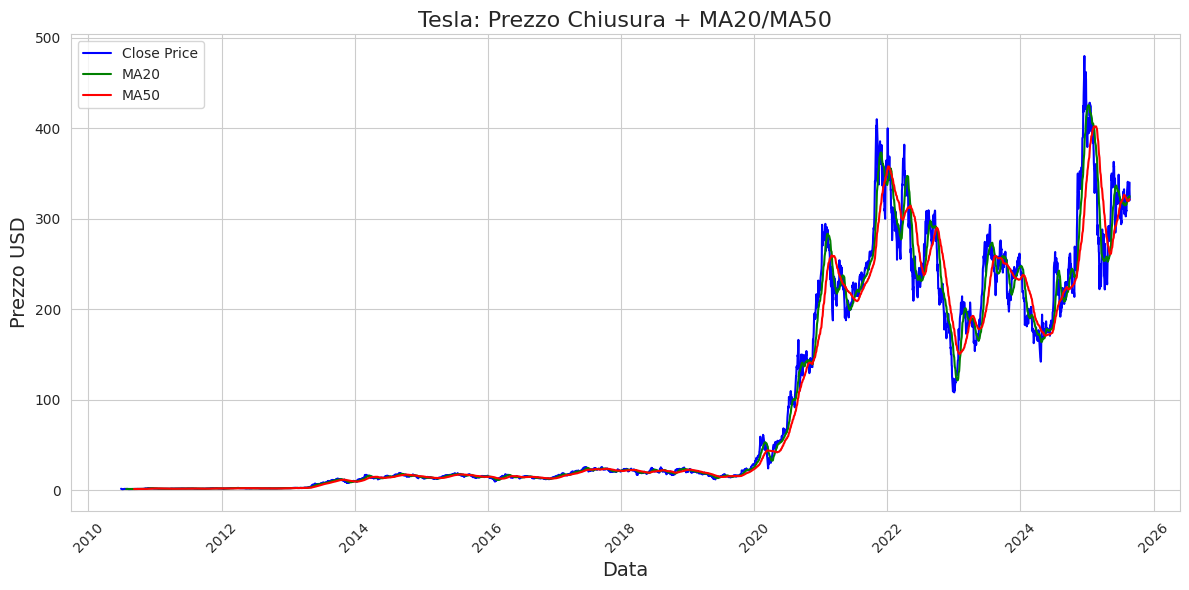

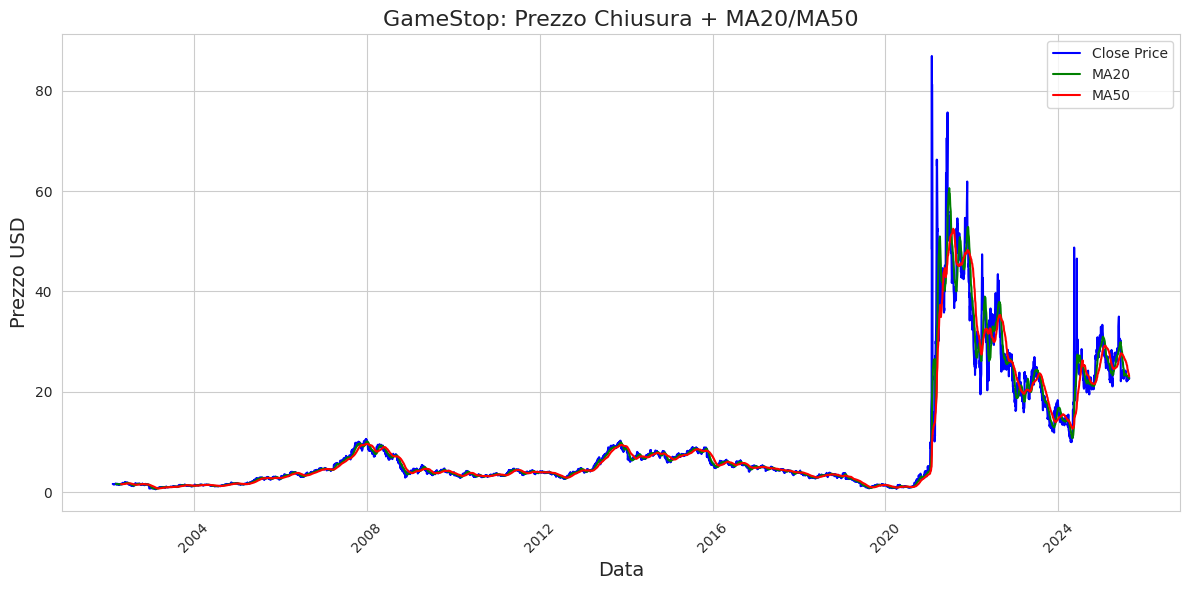

In [24]:
def plot_price(df, title, filepath):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    ax.plot(df['Date'], df['MA20'], label='MA20', color='green')
    ax.plot(df['Date'], df['MA50'], label='MA50', color='red')
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Data", fontsize=14)
    ax.set_ylabel("Prezzo USD", fontsize=14)
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    fig.savefig(filepath)
    plt.show()

plot_price(tesla_data, "Tesla: Prezzo Chiusura + MA20/MA50", os.path.join(tesla_plot_path, "tesla_close.png"))
plot_price(gme_data, "GameStop: Prezzo Chiusura + MA20/MA50", os.path.join(gme_plot_path, "gme_close.png"))


In [25]:
def plot_candlestick(df, title):
    df['MA20'] = df['Close'].rolling(20).mean()
    df['MA50'] = df['Close'].rolling(50).mean()

    fig = go.Figure()
    fig.add_trace(go.Candlestick(
        x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='Prezzo'
    ))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['MA20'], line=dict(color='blue', width=1), name='MA20'))
    fig.add_trace(go.Scatter(x=df['Date'], y=df['MA50'], line=dict(color='red', width=1), name='MA50'))
    fig.update_layout(title=title, xaxis_title='Data', yaxis_title='Prezzo USD')
    fig.show()

plot_candlestick(tesla_data, "Tesla: Candlestick + MA20/MA50")
plot_candlestick(gme_data, "GameStop: Candlestick + MA20/MA50")


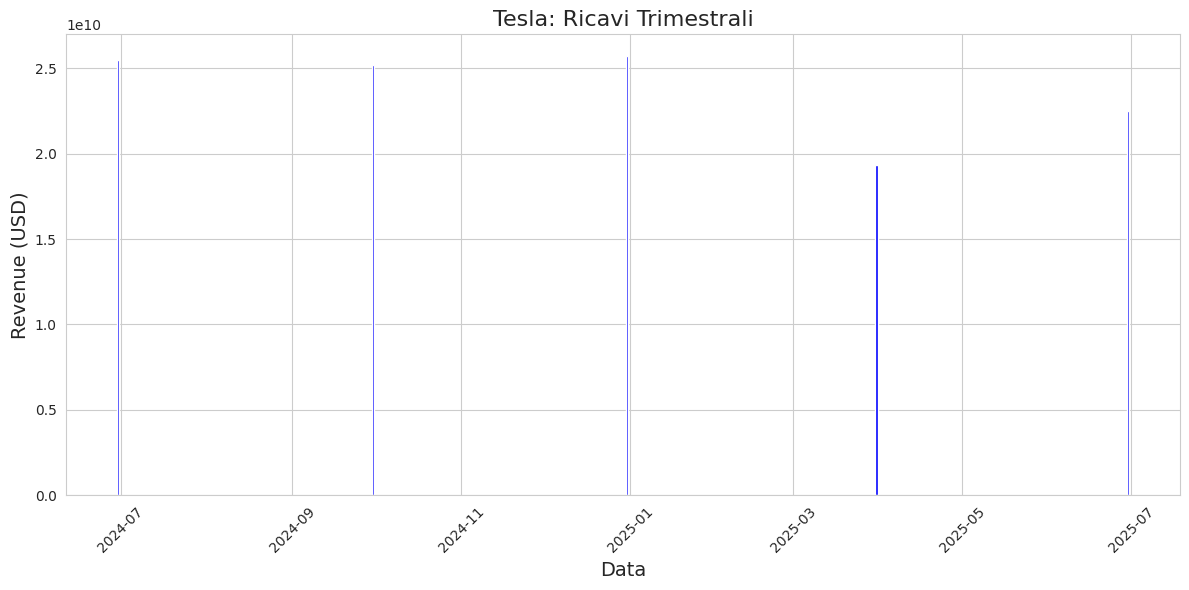

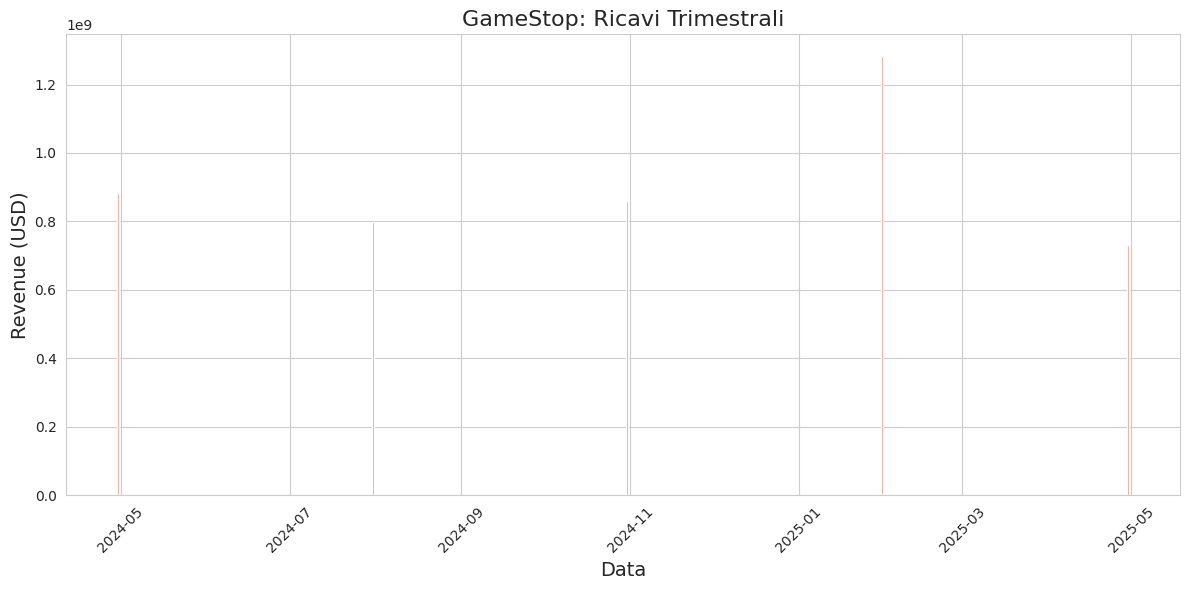

In [13]:
# -------------------------------
# Ricavi trimestrali Tesla
# -------------------------------
tesla_fin = yf.Ticker("TSLA")
tesla_revenue = tesla_fin.quarterly_financials.T  # trimestrali
tesla_revenue = tesla_revenue[['Total Revenue']].dropna()
tesla_revenue.reset_index(inplace=True)
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(tesla_revenue['Date'], tesla_revenue['Revenue'], color='blue')
ax.set_title("Tesla: Ricavi Trimestrali", fontsize=16)
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Revenue (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
fig.savefig("Plots/tesla_revenue.png")
plt.show()


# -------------------------------
# Ricavi trimestrali GameStop
# -------------------------------
gme_fin = yf.Ticker("GME")
gme_revenue = gme_fin.quarterly_financials.T  # trimestrali
gme_revenue = gme_revenue[['Total Revenue']].dropna()
gme_revenue.reset_index(inplace=True)
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(gme_revenue['Date'], gme_revenue['Revenue'], color='salmon')
ax.set_title("GameStop: Ricavi Trimestrali", fontsize=16)
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Revenue (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
fig.savefig("Plots/gme_revenue.png")
plt.show()


In [26]:
# Scarica dati Tesla recenti
tesla_recent = yf.download('TSLA', start='2023-01-01', end='2025-08-24')

# Calcolo medie mobili
tesla_recent['MA20'] = tesla_recent['Close'].rolling(window=20).mean()
tesla_recent['MA50'] = tesla_recent['Close'].rolling(window=50).mean()

# Grafico a candele
fig = go.Figure()
fig.add_trace(go.Candlestick(
    x=tesla_recent.index,
    open=tesla_recent['Open'],
    high=tesla_recent['High'],
    low=tesla_recent['Low'],
    close=tesla_recent['Close'],
    name='Prezzo'
))
fig.add_trace(go.Scatter(
    x=tesla_recent.index,
    y=tesla_recent['MA20'],
    line=dict(color='blue', width=1),
    name='MA20'
))
fig.add_trace(go.Scatter(
    x=tesla_recent.index,
    y=tesla_recent['MA50'],
    line=dict(color='red', width=1),
    name='MA50'
))
fig.update_layout(title='Grafico a candele Tesla con MA20 e MA50', xaxis_title='Data', yaxis_title='Prezzo USD')
fig.show()


/tmp/ipython-input-4076213089.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [27]:
# Tesla
tesla_fin = yf.Ticker("TSLA")
tesla_revenue = tesla_fin.quarterly_financials.T[['Total Revenue']].dropna()
tesla_revenue.reset_index(inplace=True)
tesla_revenue.columns = ['Date', 'Revenue']

fig_revenue_tsla = go.Figure()
fig_revenue_tsla.add_trace(go.Bar(
    x=tesla_revenue['Date'],
    y=tesla_revenue['Revenue'],
    name='Revenue'
))
fig_revenue_tsla.update_layout(
    title='Tesla: Ricavi Trimestrali',
    xaxis_title='Data',
    yaxis_title='Revenue USD'
)
fig_revenue_tsla.show()

# GameStop
gme_fin = yf.Ticker("GME")
gme_revenue = gme_fin.quarterly_financials.T[['Total Revenue']].dropna()
gme_revenue.reset_index(inplace=True)
gme_revenue.columns = ['Date', 'Revenue']

fig_revenue_gme = go.Figure()
fig_revenue_gme.add_trace(go.Bar(
    x=gme_revenue['Date'],
    y=gme_revenue['Revenue'],
    name='Revenue'
))
fig_revenue_gme.update_layout(
    title='GameStop: Ricavi Trimestrali',
    xaxis_title='Data',
    yaxis_title='Revenue USD'
)
fig_revenue_gme.show()
